# Virat Kohli ODI Score Prediction.

In [1]:
import pickle
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as mp

from scipy import stats
from scipy.stats import zscore
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

from sklearn import preprocessing
from sklearn.preprocessing import PolynomialFeatures
from pandas.api.types import is_numeric_dtype

from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split

In [2]:
csv = pd.read_csv("E:/Data Sets/ODI Mens.csv")
df = pd.DataFrame(csv)
df.head()

,Player,Runs_Scored,Innings_Runs,Innings Minutes Batted,Innings Batted Flag,Innings Not Out Flag,Innings_Balls,Innings Boundary Fours,Innings Boundary Sixes,Batting_Strike_Rate,...,Innings Overs Bowled,Innings Bowled Flag,Innings Maidens Bowled,Innings Runs Conceded,Innings Wickets Taken,4 Wickets,5 Wickets,10 Wickets,Innings Wickets Taken Buckets,Innings Economy Rate
0,JJ Roy,180,180,151,1.0,0.0,151,16,5,119.2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,AD Hales,171,171,166,1.0,0.0,122,22,4,140.16,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,JJ Roy,162,162,172,1.0,0.0,118,13,3,137.28,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,AJ Strauss,158,158,188,1.0,0.0,145,18,1,108.96,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,AJ Strauss,154,154,201,1.0,0.0,140,16,5,110,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
df = df[df['Player'] == 'V Kohli']
df

,Player,Runs_Scored,Innings_Runs,Innings Minutes Batted,Innings Batted Flag,Innings Not Out Flag,Innings_Balls,Innings Boundary Fours,Innings Boundary Sixes,Batting_Strike_Rate,...,Innings Overs Bowled,Innings Bowled Flag,Innings Maidens Bowled,Innings Runs Conceded,Innings Wickets Taken,4 Wickets,5 Wickets,10 Wickets,Innings Wickets Taken Buckets,Innings Economy Rate
38058,V Kohli,183,183,211,1.0,0.0,148,22,1,123.64,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
38064,V Kohli,160*,160,220,1.0,1.0,159,12,2,100.62,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
38067,V Kohli,157*,157,217,1.0,1.0,129,13,4,121.7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
38068,V Kohli,154*,154,202,1.0,1.0,134,16,1,114.92,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
38083,V Kohli,140,140,-,1.0,0.0,107,21,2,130.84,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
167798,V Kohli,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,DNB,0.0,-,-,-,1.0,0.0,0.0,-,-
167804,V Kohli,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,DNB,0.0,-,-,-,1.0,0.0,0.0,-,-
167808,V Kohli,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,DNB,0.0,-,-,-,1.0,0.0,0.0,-,-
167816,V Kohli,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,DNB,0.0,-,-,-,1.0,0.0,0.0,-,-


# Data Preprocessing.

In [4]:
df.replace('-',np.nan,inplace=True)
df.head(10)

,Player,Runs_Scored,Innings_Runs,Innings Minutes Batted,Innings Batted Flag,Innings Not Out Flag,Innings_Balls,Innings Boundary Fours,Innings Boundary Sixes,Batting_Strike_Rate,...,Innings Overs Bowled,Innings Bowled Flag,Innings Maidens Bowled,Innings Runs Conceded,Innings Wickets Taken,4 Wickets,5 Wickets,10 Wickets,Innings Wickets Taken Buckets,Innings Economy Rate
38058,V Kohli,183,183,211,1.0,0.0,148,22,1,123.64,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
38064,V Kohli,160*,160,220,1.0,1.0,159,12,2,100.62,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
38067,V Kohli,157*,157,217,1.0,1.0,129,13,4,121.7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
38068,V Kohli,154*,154,202,1.0,1.0,134,16,1,114.92,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
38083,V Kohli,140,140,NaN,1.0,0.0,107,21,2,130.84,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
38086,V Kohli,139*,139,192,1.0,1.0,126,12,3,110.31,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
38093,V Kohli,138,138,202,1.0,0.0,140,6,5,98.57,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
38097,V Kohli,136,136,157,1.0,0.0,122,16,2,111.47,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
38099,V Kohli,133*,133,133,1.0,1.0,86,16,2,154.65,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
38104,V Kohli,131,131,NaN,1.0,0.0,96,17,2,136.45,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df.dropna(subset=['Innings_Runs'], axis=0,inplace=True)

In [6]:
df = df[['Innings_Runs','Innings_Balls','Innings_Number','Opposition','Ground']]

In [7]:
df = df.iloc[0:239]
df

,Innings_Runs,Innings_Balls,Innings_Number,Opposition,Ground
38058,183,148,2,v Pakistan,Dhaka
38064,160,159,1,v South Africa,Cape Town
38067,157,129,1,v West Indies,Visakhapatnam
38068,154,134,2,v New Zealand,Mohali
38083,140,107,2,v West Indies,Guwahati
...,...,...,...,...,...
42264,0,5,2,v South Africa,Durban
42272,0,3,1,v England,Cardiff
42299,0,5,1,v Sri Lanka,The Oval
42304,0,4,1,v Australia,Chennai


In [8]:
df.dtypes

Innings_Runs      object
Innings_Balls     object
Innings_Number    object
Opposition        object
Ground            object
dtype: object

In [9]:
df['Opposition'] = df['Opposition'].str.lstrip('v.!?" " \n\t')

In [10]:
df['Innings_Number'] = df['Innings_Number'].replace('1','First')
df

,Innings_Runs,Innings_Balls,Innings_Number,Opposition,Ground
38058,183,148,2,Pakistan,Dhaka
38064,160,159,First,South Africa,Cape Town
38067,157,129,First,West Indies,Visakhapatnam
38068,154,134,2,New Zealand,Mohali
38083,140,107,2,West Indies,Guwahati
...,...,...,...,...,...
42264,0,5,2,South Africa,Durban
42272,0,3,First,England,Cardiff
42299,0,5,First,Sri Lanka,The Oval
42304,0,4,First,Australia,Chennai


In [11]:
df['Innings_Number'] = df['Innings_Number'].replace('2','Second')
df

,Innings_Runs,Innings_Balls,Innings_Number,Opposition,Ground
38058,183,148,Second,Pakistan,Dhaka
38064,160,159,First,South Africa,Cape Town
38067,157,129,First,West Indies,Visakhapatnam
38068,154,134,Second,New Zealand,Mohali
38083,140,107,Second,West Indies,Guwahati
...,...,...,...,...,...
42264,0,5,Second,South Africa,Durban
42272,0,3,First,England,Cardiff
42299,0,5,First,Sri Lanka,The Oval
42304,0,4,First,Australia,Chennai


In [12]:
df['Innings_Runs'] = df['Innings_Runs'].replace('0',np.nan)
df.dropna(subset=['Innings_Runs'],axis=0,inplace=True)
df

,Innings_Runs,Innings_Balls,Innings_Number,Opposition,Ground
38058,183,148,Second,Pakistan,Dhaka
38064,160,159,First,South Africa,Cape Town
38067,157,129,First,West Indies,Visakhapatnam
38068,154,134,Second,New Zealand,Mohali
38083,140,107,Second,West Indies,Guwahati
...,...,...,...,...,...
41857,1,3,First,South Africa,Nagpur
41867,1,5,First,Sri Lanka,Hambantota
41885,1,13,Second,Australia,Sydney
41886,1,4,Second,Bangladesh,Dhaka


In [13]:
df['Innings_Runs'] = df['Innings_Runs'].astype(int)
df['Innings_Balls'] = df['Innings_Balls'].astype(int)
df['Innings_Number'] = df['Innings_Number'].astype('category')
df['Opposition'] = df['Opposition'].astype('category')
df['Ground'] = df['Ground'].astype('category')
df.dtypes

Innings_Runs         int32
Innings_Balls        int32
Innings_Number    category
Opposition        category
Ground            category
dtype: object

# Finding the Pearson Correlation value and skewness.

In [14]:
df['Innings_Runs'].skew()

0.6386361110706943

In [15]:
pearson_coef,p_value = stats.pearsonr(df['Innings_Balls'],df['Innings_Runs'])
print(pearson_coef)
print(p_value)

0.9563960683394175
1.0364464802267488e-121


In [16]:
df.dtypes

Innings_Runs         int32
Innings_Balls        int32
Innings_Number    category
Opposition        category
Ground            category
dtype: object

# Mapping the categorical values to integers.

In [17]:
category_col =['Innings_Number','Opposition','Ground']
labelEncoder = preprocessing.LabelEncoder() 
  
mapping_dict ={} 
for col in category_col: 
    df[col] = labelEncoder.fit_transform(df[col]) 
  
    le_name_mapping = dict(zip(labelEncoder.classes_,labelEncoder.transform(labelEncoder.classes_))) 
  
    mapping_dict[col]= le_name_mapping 
print(mapping_dict)

{'Innings_Number': {'First': 0, 'Second': 1}, 'Opposition': {'Afghanistan': 0, 'Australia': 1, 'Bangladesh': 2, 'England': 3, 'Ireland': 4, 'Netherlands': 5, 'New Zealand': 6, 'Pakistan': 7, 'South Africa': 8, 'Sri Lanka': 9, 'U.A.E.': 10, 'West Indies': 11, 'Zimbabwe': 12}, 'Ground': {'Adelaide': 0, 'Ahmedabad': 1, 'Auckland': 2, 'Bengaluru': 3, 'Birmingham': 4, 'Brisbane': 5, 'Bulawayo': 6, 'Canberra': 7, 'Cape Town': 8, 'Cardiff': 9, 'Centurion': 10, 'Chennai': 11, 'Chester-le-Street': 12, 'Colombo (RPS)': 13, 'Cuttack': 14, 'Dambulla': 15, 'Delhi': 16, 'Dhaka': 17, 'Dharamsala': 18, 'Durban': 19, 'Fatullah': 20, 'Guwahati': 21, 'Hambantota': 22, 'Hamilton': 23, 'Harare': 24, 'Hobart': 25, 'Hyderabad (Deccan)': 26, 'Indore': 27, 'Jaipur': 28, 'Johannesburg': 29, 'Kanpur': 30, 'Kingston': 31, 'Kochi': 32, 'Kolkata': 33, 'Leeds': 34, "Lord's": 35, 'Manchester': 36, 'Melbourne': 37, 'Mohali': 38, 'Mount Maunganui': 39, 'Mumbai': 40, 'Mumbai (BS)': 41, 'Nagpur': 42, 'Napier': 43, 'North

# Outlier detection using seaborn boxplot visualization.

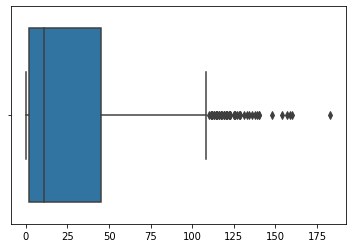

In [18]:
sns.boxplot(x=df)

# Calculate z-scores of `df`

In [19]:
for name in list(df.columns):
    if is_numeric_dtype(df[name]):
        z_scores = stats.zscore(df[name])
        abs_z_scores = np.abs(z_scores)
        filtered_entries = (abs_z_scores < 2.5)
        df = df[filtered_entries]
df

,Innings_Runs,Innings_Balls,Innings_Number,Opposition,Ground
38067,157,129,0,11,58
38068,154,134,1,6,38
38083,140,107,1,11,21
38086,139,126,1,9,52
38093,138,140,0,8,11
...,...,...,...,...,...
41857,1,3,0,8,42
41867,1,5,0,9,22
41885,1,13,1,1,54
41886,1,4,1,2,17


In [20]:
df = df.reset_index()

In [21]:
df = df.drop(['index'],axis=1)
df

,Innings_Runs,Innings_Balls,Innings_Number,Opposition,Ground
0,157,129,0,11,58
1,154,134,1,6,38
2,140,107,1,11,21
3,139,126,1,9,52
4,138,140,0,8,11
...,...,...,...,...,...
219,1,3,0,8,42
220,1,5,0,9,22
221,1,13,1,1,54
222,1,4,1,2,17


# Perform simple visualizations to generate insights.

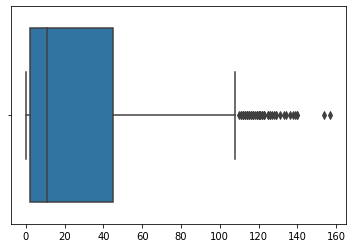

In [22]:
sns.boxplot(x=df)

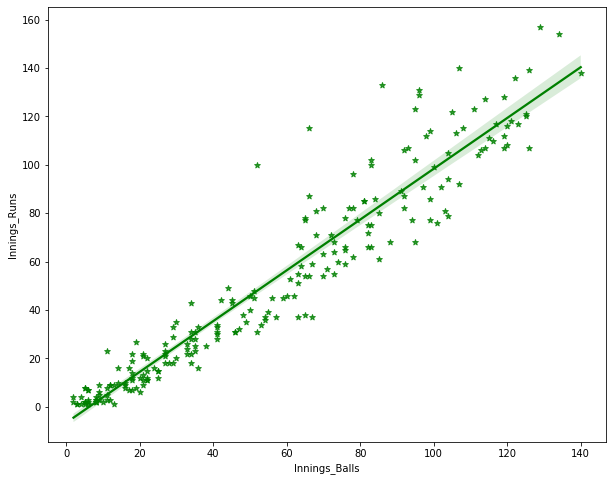

In [23]:
width = 10
height = 8
mp.figure(figsize=(width,height))
sns.regplot(x='Innings_Balls',y='Innings_Runs',data=df,color='g',marker='*')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002BA01A54648>]],
      dtype=object)

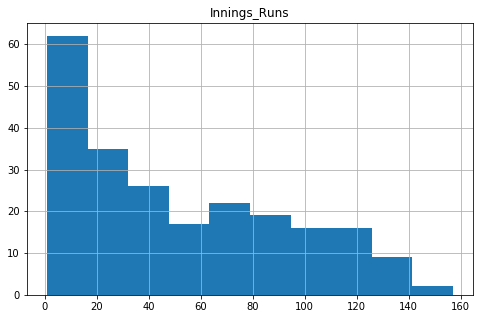

In [24]:
df.hist('Innings_Runs',figsize=(8,5))

# Defining the Independent Variable (X).

In [25]:
X = df.iloc[: , 1:5]
X[0:5]

,Innings_Balls,Innings_Number,Opposition,Ground
0,129,0,11,58
1,134,1,6,38
2,107,1,11,21
3,126,1,9,52
4,140,0,8,11


# Defining the Dependent Variable (y).

In [26]:
y = df.iloc[: , 0]
y[0:5]

0    157
1    154
2    140
3    139
4    138
Name: Innings_Runs, dtype: int32

# Split the dataset into training data and test data.

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.37, random_state=13)

In [28]:
print ('Training Set:',X_train.shape,y_train.shape)
print ('Testing Set:',X_test.shape, y_test.shape)

Training Set: (141, 4) (141,)
Testing Set: (83, 4) (83,)


# Develope a ML Model using K-Nearest Neighbor - Regressor.

In [29]:
#To Find the best K value.
'''
K = 10
mean_acc = []
for n in range(1,K+1):
    #Train Model and Predict
    input = [('scaler',PolynomialFeatures(3)),('model',KNeighborsRegressor(n_neighbors=n))]
    pipe = Pipeline(input)
    pipe.fit(X_train,y_train)
    yt = pipe.predict(X_test)
    mean_acc.append(mean_squared_error(y_test, yt, squared=False))
mean_acc

'''

"\nK = 10\nmean_acc = []\nfor n in range(1,K+1):\n    #Train Model and Predict\n    input = [('scaler',PolynomialFeatures(3)),('model',KNeighborsRegressor(n_neighbors=n))]\n    pipe = Pipeline(input)\n    pipe.fit(X_train,y_train)\n    yt = pipe.predict(X_test)\n    mean_acc.append(mean_squared_error(y_test, yt, squared=False))\nmean_acc\n\n"

In [30]:
k = 10
input = [('scaler',PolynomialFeatures(2)),('model',KNeighborsRegressor(n_neighbors=k))]
pipe = Pipeline(input)
pipe.fit(X_train,y_train)
yhat = pipe.predict(X_test)
print('Mean Squared Error is :',mean_squared_error(y_test, yhat, squared=False))

Mean Squared Error is : 11.15430113162361


# Model Evaluation Metrics

In [31]:
print ("R2 Score is",r2_score(y_test, yhat))
print ("Mean Squared Error is",mean_squared_error(y_test, yhat))
print ("Mean Absolute Error is",mean_absolute_error(y_test, yhat))
print ("Root Mean Squared Error is",mean_squared_error(y_test, yhat,squared=False))

R2 Score is 0.9247736949383651
Mean Squared Error is 124.41843373493975
Mean Absolute Error is 8.140963855421687
Root Mean Squared Error is 11.15430113162361


In [32]:
yhat

array([ 11.9, 104.9,  10.1,  32.4,  56.4,   5.4,  70.7,  15.6,   7.1,
        13. ,  61.5,   5.4,  12.7,  72.3,  24.7,   5.1,  60.4,  42.6,
        80.3,  82.4, 113.6,   9.4,  19.1,  98. ,   8.2,  16.8,  83.8,
        77.2,  61.3,  95.2,  10.6,  20.5,  62.9,  28.2,  75.9,   8.5,
        35.5,  29.7,  41. ,  34.4,   8. ,  53. ,  87.5, 115.1,  31.7,
       107.9,   8.5,  91.3,  80.3,  57.4,   8.2,  12.1,  40.3,  17.5,
        57.4,  73.1,  55.3,  42.5, 112.3,   4.8,   9.9,  95.9, 120.3,
         4.7, 127.8,  91.3,   7.9,   7.9,  34.6,  74.1,  31.1,  62.4,
        96.4,  84.4, 121. ,   9.9, 116.7,   8.5, 113.5,  20.8,   5.1,
        38.1,  73.9])

# Distribution plot to evaluate the model using visual methods.

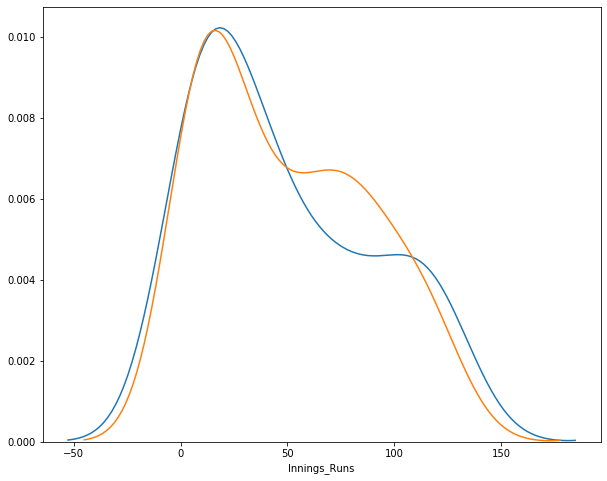

In [33]:
mp.figure(figsize=(width,height))
ax1 = sns.distplot(y_test,hist=False)
sns.distplot(yhat,ax=ax1,hist=False)

# Save the model using Pickle

In [34]:
pickle.dump(pipe, open('virat.pkl','wb'))

In [35]:
df.to_csv('data.csv')

In [36]:
print(pipe.predict([[106, 1, 1, 2]]))

[109.2]


# THE END